In [ ]:
pip install chardet

In [7]:
import chardet
with open("dataset_grad_pres.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

In [8]:
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
evasao2 = pd.read_csv("dataset_grad_pres.csv", sep = ";", encoding = "ISO-8859-1")

In [21]:
evasao2.head()

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,ETNIA,SEXO,TIPOCURSO,LNG,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,NaN,F,GRADUAÇÃO PRESENCIAL,"-43,3646367","-21,7531292","VALE DO IPE, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,BRANCA,M,GRADUAÇÃO PRESENCIAL,"-43,4042512","-21,8043129","PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,NaN,F,GRADUAÇÃO PRESENCIAL,"-43,3585569","-21,7500694","SANTA CATARINA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,NaN,F,GRADUAÇÃO PRESENCIAL,"-44,2857937","-21,718564","ANDRELANDIA, MG, BRASIL",NaN,NaN,NaN
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,NaN,F,GRADUAÇÃO PRESENCIAL,"-42,9806087","-20,850899","PAULA CANDIDO, MG, BRASIL",NaN,NaN,NaN


In [ ]:
evasao2.info()

In [ ]:
evasao2["CURSO_NOME"].unique()


In [14]:
evasao2["COTA"].unique()


array([nan, 'Grupo B', 'Grupo C', 'Grupo A', 'Vaga Ociosa', 'Grupo D',
       'Grupo E', 'Grupo D1', 'Grupo A1', 'Grupo B1', 'Grupo B - antigo',
       'Grupo A - antigo', 'Grupo E1', 'Grupo C - antigo', 'Grupo F'],
      dtype=object)

In [31]:
ativos = evasao2[evasao2['SITUACAO'].str.lower() == 'ativo']
ativos

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,ETNIA,SEXO,TIPOCURSO,LNG,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM
169,2019,2,PISM,Grupo A,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,PRETA,F,GRADUAÇÃO PRESENCIAL,"-43,3475548","-21,7322316","PROGRESSO, JUIZ DE FORA, MG, BRASIL","-43,3475548","-21,7322316","PROGRESSO, JUIZ DE FORA, MG, BRASIL"
177,2020,2,PISM,Grupo E,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,BRANCA,M,GRADUAÇÃO PRESENCIAL,"-44,0911576","-22,1464084","SANTA RITA DE JACUTINGA, MG, BRASIL","-44,0911576","-22,1464084","SANTA RITA DE JACUTINGA, MG, BRASIL"
181,2021,1,PISM,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,BRANCA,M,GRADUAÇÃO PRESENCIAL,"-43,3610044","-21,8033306","CIDADE NOVA, JUIZ DE FORA, MG, BRASIL","-43,3610044","-21,8033306","CIDADE NOVA, JUIZ DE FORA, MG, BRASIL"
183,2021,1,SiSU,Grupo A,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,PRETA,M,GRADUAÇÃO PRESENCIAL,"-43,0563689","-21,7236581","BICAS, MG, BRASIL","-43,0563689","-21,7236581","BICAS, MG, BRASIL"
187,2021,2,SiSU,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,PARDA,F,GRADUAÇÃO PRESENCIAL,"-42,6141813","-21,196919","MIRAI, MG, BRASIL",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64534,2023,1,PISM,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,PARDA,M,GRADUAÇÃO PRESENCIAL,"-43,3502844","-21,7496381","LADEIRA, JUIZ DE FORA, MG, BRASIL","-43,3502844","-21,7496381","LADEIRA, JUIZ DE FORA, MG, BRASIL"
64535,2023,1,SiSU,Grupo A,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,PARDA,F,GRADUAÇÃO PRESENCIAL,"-42,6097596","-20,6781012","CANAA, MG, BRASIL","-42,6097596","-20,6781012","CANAA, MG, BRASIL"
64536,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,BRANCA,M,GRADUAÇÃO PRESENCIAL,"-56,0978917","-15,6014109","CUIABA, MT, BRASIL","-56,0978917","-15,6014109","CUIABA, MT, BRASIL"
64537,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,BRANCA,M,GRADUAÇÃO PRESENCIAL,"-44,4513295","-22,4709621","RESENDE, RJ, BRASIL","-44,4513295","-22,4709621","RESENDE, RJ, BRASIL"


In [32]:
ativos_por_ano = ativos.groupby('ANO_INGRESSO').size()
ativos_por_ano

ANO_INGRESSO
2008       2
2009       6
2010      15
2011      36
2012      69
2013     106
2014     185
2015     414
2016     770
2017    1355
2018    2134
2019    2933
2020    2837
2021    2864
2022    2957
2023    2869
dtype: int64

In [35]:
retidos_por_ano_2017 = ativos_por_ano[ativos_por_ano.index <= 2017]
retidos_por_ano_2017

ANO_INGRESSO
2008       2
2009       6
2010      15
2011      36
2012      69
2013     106
2014     185
2015     414
2016     770
2017    1355
dtype: int64

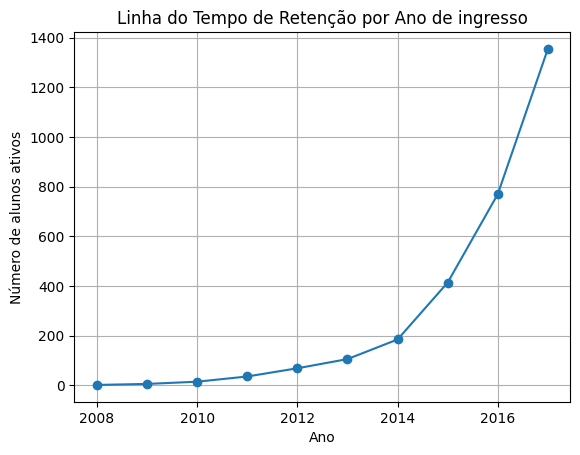

In [36]:
plt.plot(retidos_por_ano_2017.index, retidos_por_ano_2017.values, marker='o', linestyle='-')
plt.xlabel('Ano')
plt.ylabel('Número de alunos ativos')
plt.title('Linha do Tempo de Retenção por Ano de ingresso')
plt.grid(True)
plt.show()